# WPA #5 - Plotting - Chapters 11 & 12

## Create you own data.

In this WPA, we will practise plotting data. Often, before running an experiment, you will want to check your script is performing correctly by simulating data. Therefore, this week, we will start by simulating data for a fake Experiment. This fake Experiment will look at the effect of stress on memory performance. We will create 200 fake participants, half of whom conducted a memory test in a 'high' stress environment, while the other half completed it in a 'low' stress environment. We will also pretend that our researchers were also interested in any possible effect of either participant age or gender. The table shows the basic structure of the data we will generate.

Variable | Description 
------------  | ------------------------------------------------------- 
id             | Participant id number from 1 to 200 
age             | Participant age. All fake participants should be over 18
stress             | Whether the participant completed the 'low' stress or 'high' stress task
gender             | Participant gender
memory             | Participant score on the memory task. All scores should be between 0 and 100

First, open a new R script and save it as **wpa5.R** in the **R** folder in your project directory. Copy, and run, the `setwd` code from your script last week to the current script.

We will use the code below to generate our fake data as a data.frame. All the functions we are using are those you should already be familiar with.

In [1]:
set.seed(100)
fakedf= data.frame(age= round(rnorm(n=200, mean=50, sd=18) ), 
                     stress= rep(1:2 , each=100),
                     gender= sample(x=c("female", "male"), size=200, replace=TRUE) )
fakedf$memory<- with(data=fakedf, exp= 55 + 15*stress - 0.7*age + rnorm(n=200, mean=5, sd=10) )
fakedf$stress[fakedf$stress==1]= "low"
fakedf$stress[fakedf$stress==2]= "high"

Let's look at the structure of the data frame using `str()`.

In [2]:
str(fakedf)

'data.frame':	200 obs. of  4 variables:
 $ age   : num  41 52 49 66 52 56 40 63 35 44 ...
 $ stress: chr  "low" "low" "low" "low" ...
 $ gender: Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 2 1 ...
 $ memory: num  27.7 28.4 30.2 22.3 42.4 ...


## A. Histograms

Several columns of our data (`age`, `memory`) have restrictions on acceptable data values that may not be met due to the way we generated our data. We could use logical indexing, or function like `range` or `table` to check for innappropriate values. Or we could use `histogram` to both check for incongruous scores, and visualise our data.

4. Create a histogram of `age` using `hist`. 
5. The default title and axis labels R uses aren't very informative. Add your own (e.g. "Histogram of Ages", "Age"). Use the `main` and `xlab` arguments.
6. The histogram shows several values of `age` that are below 18. Replace these with values of 18 (hint: Use indexing like last week). Redo the histogram to check. 
7. Create a histogram for `memory` scores. Remember to label the x-axis and change the title. If there are any scores below 0, or above 100, replace them.
8. When checking statistical assumption (e.g. normality, homoscedacity), we often need to look at the distribution of our Dependant Variable (in this case `memory`), at each level of our Independent Variable (`stress`). Create separate memory histograms for each level of stress (Hint: use indexing or `subset`). Give the histograms appropriate titles.
9. Plot the two histograms side by side, using either `layout` or `par(mfrow)`. Remember to return the layout to the default afterwards.
10. Make the scale of the x-axis the same for both plots by using the `breaks` argument (you could also use `xlim`, but don't). Change the bin widths for both histograms to 5 as well (also using `breaks`).
11. Use `abline` or `segments` to add the mean `memory` score to each histogram. You'll need to calculate the mean for each level of `stress` first.
12. You can't create a histogram for the `stress` or `gender` columns. What would be a better way to check these data?

## B. Scatterplots

13. Create a scatterplot showing the relationship between `age` and `memory` score. Look back at the section where we generated our data. Does the figure look like you would expect?
14. If you haven't already, add appropriate labels and titles to the figure. The arguments are the same as those used for the histogram (e.g. `main`, `ylab`, `xlab`).
15. Now, make the plot look a bit nicer! Try changing the point types (e.g.; `pch = 16`), point colors (e.g.; `col = gray(.0, .5)`, `col=rgb(0, 0, 1, 0.5)`, or `col = "blue"`)
16. Rather than using the colour name (e.g. `"blue"`) you can also set colours, with transparency, by using `col= rgb(red, green, blue, alpha)`. By default `rgb` accepts values between 0 and 1 for each of the named colour arguments, and for the alpha argument, which sets the transparency (if you prefer to give the colour components as values between 0 and 255, you can set the optional `maxColorValue` argument to 255). For example if you wanted non-transparent red you would use `col= rgb(1,0,0,1)`, while `col= rgb(1, 1, 0.8)` would produce a slightly transparent yellow. You can play around with `rgb` if you would like.
17. Now let's add a regression line to the plot from Question 3. Adding a regression line is easy. First, create a linear model object created with `lm()`. Then add the model to the plot with `abline()`.
18. Lets now create a new scatterplot of `age` against `memory`, but with the two `stress` conditions plotted in different colours. This will give us an idea of whether the relationship between age and memory interacts with stress. First copy and modify the code for the previous `scatterplot`, so that it only shows participants in the `low stress` condition (use indexing). Make sure the points are slightly transparent.
19. Now use the `points` function to add the values for those in the `high stress` condition. Make sure the colour is different. You could also use separate point types (`pch`). Do you notice anything wrong with the figure?
20. Because you didn't specify the axis lengths (`xlim`, `ylim`), `R` set them automatically to accommodate the total range of values in the plot. However, as we only use the `low stress` data when calling the plot function, this is based only on the `memory` and `age` ranges for the `low stress` participants. Use `xlim` and `ylim` to set the axis lengths yourself, so that they include all data.
21. Finally add grid lines with `grid()` (Hint: Just evaluate `grid()` after your plot!). Now that you have the completed plot, compare the relationship between age, stress and memory in the figure, to the code you used to generate the dataset.

## C. Barplot

22. Create a `barplot` of mean memory score by stress condition. You'll need to use the means you calculated in Question 11. 
23. Now we'll create a new barplot which includes both `gender` and `stress`. Hint: in order to create a stacked barplot with the `barplot()` function, we first need to create a matrix containing the mean `memory` scores as a function of `stress` and `gender` with `aggregate()` and `cbind()`.

In [3]:
## Hint for task C2 (only for creating the matrix, you can then use the matrix in your barplot):

# Create a matrix of group means
mem.means <- aggregate(memory ~ stress + gender,
                      FUN = mean, 
                      data = fakedf)

mem.means.mtx <- cbind(mem.means[1:2, 3], mem.means[3:4, 3])
colnames(mem.means.mtx) <- c("Female", "Male")
rownames(mem.means.mtx) <- c("High", "Low")

In [4]:
mem.means

stress,gender,memory
high,female,53.52233
low,female,40.74402
high,male,53.57111
low,male,37.52108


In [5]:
mem.means.mtx

,Female,Male
High,53.52233,53.57111
Low,40.74402,37.52108


## D. Error Bars on plots

In task C you have created plots of the mean scores for different groupings of our participants. In general, it is very bad practice to plot only the means of your groups without giving an indication of the **spread** of your individual participants around these means. This is because your reader can only interpret the difference between means if they are aware of the scaling and spread of the responses. For instance, the 2 Figures below have the same group means (shown by the bars) but very different standard errors of the means (shown by the error bars).

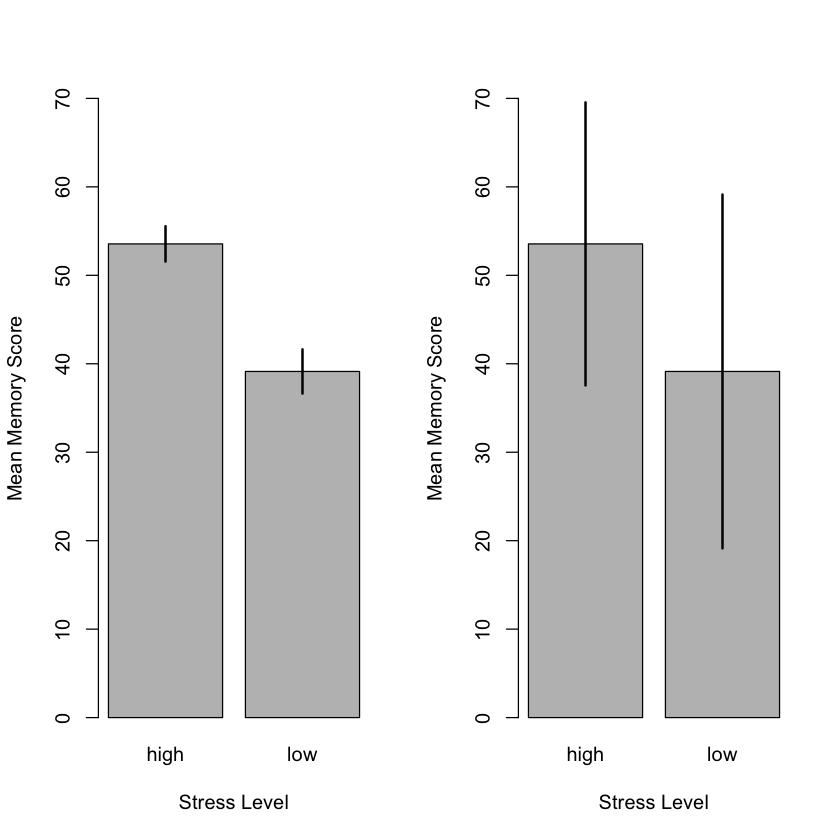

In [6]:
mean.memory<- aggregate(memory~stress, data= fakedf, FUN= mean)

layout(m=array(1:2, dim=c(1,2)))
bars<-barplot(mean.memory[,2], 
              names.arg=mean.memory[,1], 
              ylab="Mean Memory Score", 
              xlab="Stress Level",
              ylim=c(0, 70))
segments(x0=bars, x1=bars, y0=mean.memory[,2]-c(2, 2.5), y1=mean.memory[,2]+c(2, 2.5), lwd=2)

bars<-barplot(mean.memory[,2], 
              names.arg=mean.memory[,1], 
              ylab="Mean Memory Score", 
              xlab="Stress Level",
              ylim=c(0, 70))
segments(x0=bars, x1=bars, y0=mean.memory[,2]-8*c(2, 2.5), y1=mean.memory[,2]+8*c(2, 2.5), lwd=2)

Based on these two plots, you would draw different conclusions. While we haven't run any inferential statistic tests (like a t-test), from the error bars we can see that the difference in memory between the two groups is much more substantial in the figure on the left (were se is small) compared to the figure on the right. As the error bars here as standard errors, either the effect size is much bigger in the figure on the left, or there are many more participants in that experiment (or both).

There are **many ways** to show spread in your data. You could use a barplot with error bars (see above), use plots that show distributions of your data or individual data points in addition to the means (see `pirateplot` in the textbook or the `vioplot` package), or use different summary plots, like boxpots. Here, we will go through the steps to add error bars to the plot you created in exercise C. This is not covered in the textbook. For simplicity, we will plot **standard deviations** in our error bars. 

The easiest way to add error bars to a barplot (or to a scatterplot or line plot), is to use the `segments` plotting function. `segments` lets you add multiple lines to a plot by specifying the start and endpoints of each line. This is done by passing four vectors (or matrices) to `segments` using the argument names `x0`, `x1`, `y0` and `y1`. `x0` and `y0` provide the x and y coordinates for the startpoint of each line, with the first item of `x0` and `y0` the startpoint of the first line, the second item the startpoint of the second line etc. Similarly `x1` and `y1` provide the endpoints of each line. 

For our error bars, we want each line to be vertical, meaning that `x0` and `x1` should contain the same values (i.e. same x-axis position). Further, `x0` and `x1` should match the placement of the bars in our barplot. To find the placement of our bars on the x-axis, we can store and access this information by storing our barplot (the obne you calculated in task C) as variable called `bars`. Check that `bars` is a vector containing the x-placement of our two bars.

Now that you have the x-placement of our error bars, you just need the y-placement. The bottom of each error bar `y0` should just be the height of each bar in your plot, minus the standard deviation for that group. Similarly, the top of each error bar should be the height plus the the standard deviation.

26. Calculate the standard deviation of memory scores for each stress level. Save these standard deviations as `sd.memory`.
27. Assign the barplot created in C to the name `bars`.
28. Run the barplot created in C again, and then add the error bars using the the `segments` function, as explained above. Hint: the `segments` function will take `bars` as argument for both the `x0` and `x1` arguments, and the means minus and plus the standard deviations calculated in D1 as `y0` and `y1` arguments.

## E. variable histogram

29. Go back to the memory score histograms you created. Rather than creating two separate histograms of memory scores for the two stress conditions, we can create overlapping histograms, using the `add=T` argument. Modify the following code.

## F. Scatterplot with separate reference lines

30. Go back to the `scatterplot` separated by colour. The reference line is for both groups together. Create instead separate reference lines for each group. You'll need to run two `abline` commands, one for each group.
31. You should also add a legend to the plot. Modify the following code:

## G. You pick the plot!

For the following exercises, make a plot that you think represents the data best. We are going to use the `movies` dataframe from the `yarrr` package. We installed the `yarrr` package in Week 1, so you should be able to load it using `library(yarrr)`. If you don't have it installed, use the `install.packages` function.

The `movies` dataframe in the `yarrr` package contains data about the top 5000 grossing movies of all time. You can learn more about the data using the help menu `?movies`

33. Create a plot that shows the relationship between a movie's release year and its running time. Customise it and make it look nice!

34. Create a plot that shows the relationship between a movie's budget and its revenue. Customise it and make it look nice!

35. Create a plot that shows the relationship between `genre` and `time`. Customise it and make it look nice! (Hint: You may notice that many of the times are equal to 0, try creating the plot after excluding these values using `subset`.)

### That's it! Now it's time to submit your assignment!

Save and email your `wpa_5_LastFirst.R` file to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch). 

Assignments sent after Sunday 7th April will not be considered (to pass the course you have to hand in all assignments for each week). 